In [1]:
import tensorflow as tf

from tensorflow.keras.layers import  Flatten, Dense, Input # to remove warning of line 4  
import matplotlib.pyplot as plt
import numpy as np



In [14]:
# Load and preprocess the CIFAR-10 dataset 
cifar10 = tf.keras.datasets.cifar10  #airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # split into tetsing and training already pre-split

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)  #test_images = test_images / 255.0  derease scale 
# from 0 --->255 RGB  to 0----->1
# Normalization helps improve the performance of neural networks by making the data more consistent and easier to work with

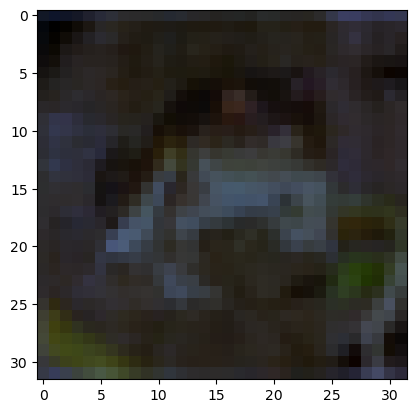

In [3]:
# #Display image
plt.imshow(x_train[0])
plt.show()
# plt.figure()
# plt.imshow(x_train[0])
# plt.colorbar()
# plt.show()

In [4]:

# Define the model
model = tf.keras.models.Sequential() #stack of layers
model.add(tf.keras.layers.Flatten())# input_shape=(32, 32, 3) input layer 

# this layer reshapes the input data from a 28x28 matrix -----> a 784-element vector.

# It is not considered a hidden layer; it is just a preprocessing step.

#prepare for the fully connected layers to minimise scale of image that have  32x32 color images(RGB) across 10 classes

 # Each neuron in this layer takes the input from all the neurons in the previous layer (the flattened input) 
# it applies a weighted sum followed by an activation function "relu"
# The relu activation function introduces non-linearity, helping the network learn more complex patterns. not perceptron 'linear dataset '

model.add(tf.keras.layers.Dense(128, activation='relu'))#128 from 21 to 42%accuracy
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #    # output layer (3)    as it include 10classes  


model.compile(optimizer='adam',# optimization for  learning rate
              loss='sparse_categorical_crossentropy',# loss measures the difference between the actual and predicted probability distributions
              # predictions match the actual labels.
              metrics=['accuracy'])


In [5]:
# model.shape

In [6]:
model.fit(x_train, y_train, epochs=10)#train the model  # (20 22--->49  & test 43%   10 21--->44 & test 41%) ----->first dense 256
#dense 128 and epochs 10 22--->43% && test 40%

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2197 - loss: 2.1198
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3222 - loss: 1.8862
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3572 - loss: 1.7943
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3741 - loss: 1.7546
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3897 - loss: 1.7107
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3998 - loss: 1.6937
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4121 - loss: 1.6577
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4185 - loss: 1.6440
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4223 - loss: 1.6257
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4308 - loss: 1.6014


In [7]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)
# if we have 10 image to compare how much it loss from the actual measure avg which are validation loss if img 1 loss .5 and img 2 lose .2 ......img n loss .4 
# validation test =(.5+.2+......+.4)/10

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4233 - loss: 1.6456
Validation loss: 1.657272219657898
Validation accuracy: 0.41600000858306885


In [8]:
# Save the model
model.save('cifar10NN.keras')

# Load the model
new_model = tf.keras.models.load_model('cifar10NN.keras')



In [9]:
# Make predictions
predictions = new_model.predict(x_test) # Evaluate how well your model generalizes to new data
print(predictions)

# print(predictions[0])



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.01700654 0.10943574 0.08253413 ... 0.00139614 0.04734767 0.01292595]
 [0.02267329 0.20465545 0.00509843 ... 0.00165987 0.16433567 0.595115  ]
 [0.2881695  0.13277274 0.01532097 ... 0.00815251 0.1878406  0.32516345]
 ...
 [0.03204362 0.00223387 0.10988908 ... 0.03372587 0.00553267 0.00620831]
 [0.05447187 0.15267082 0.08308822 ... 0.08189568 0.11494336 0.09718563]
 [0.01764931 0.00271769 0.09986125 ... 0.5525861  0.00466826 0.01331199]]


In [10]:
predictedLabel= np.argmax(predictions[0]) #finds the index of the highest probability value in the prediction array for the first test imagL
predictedLabel

3

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
class_names[predictedLabel]

'cat'

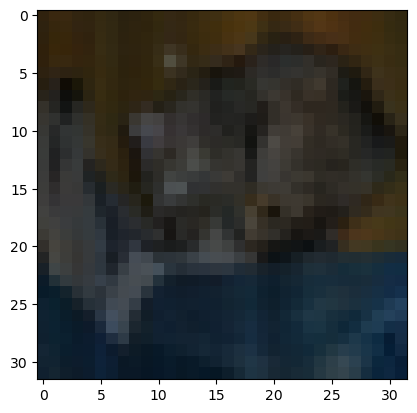

In [13]:
# Display the test image
plt.imshow(x_test[0])
plt.show()